In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics as mt
from sklearn.model_selection import LeaveOneOut

In [2]:
# task 1

df = pd.read_csv('DS2_C5_S5_OldCars_Data_Challenge.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [3]:
# task 2

df.shape

(7253, 14)

In [4]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [5]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
# task 3

for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0], inplace = True)
    if df[i].dtype != 'object':
        df[i].fillna(df[i].mean(), inplace = True)

In [7]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [8]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [9]:
# task 4

df.corr()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,1.000000,-0.001384,-0.006158,0.005573,-0.007697,0.017645,0.020004,-0.007748,0.019437,0.000289,0.003065,-0.006698,0.016836,-0.015327
Name,-0.001384,1.000000,0.033469,0.016406,0.031892,-0.072004,0.136026,-0.026578,-0.040560,0.059323,-0.099954,0.162929,-0.019847,-0.092164
Location,-0.006158,0.033469,1.000000,-0.027455,-0.035586,0.113209,0.048700,-0.029547,0.019332,-0.041717,0.026886,-0.034488,0.008508,-0.105744
Year,0.005573,0.016406,-0.027455,1.000000,-0.187859,-0.131888,-0.099975,-0.385503,0.287083,-0.060849,0.025195,0.008137,0.056595,0.279449
Kilometers_Driven,-0.007697,0.031892,-0.035586,-0.187859,1.000000,-0.109530,0.031166,0.088485,-0.078287,0.026921,-0.050574,0.090162,-0.024133,-0.011318
Fuel_Type,0.017645,-0.072004,0.113209,-0.131888,-0.109530,1.000000,0.125346,0.048425,-0.101094,-0.063172,0.170280,-0.294250,0.048008,-0.278092
Transmission,0.020004,0.136026,0.048700,-0.099975,0.031166,0.125346,1.000000,0.001272,0.321358,-0.266410,0.322714,0.079073,-0.027071,-0.535699
Owner_Type,-0.007748,-0.026578,-0.029547,-0.385503,0.088485,0.048425,0.001272,1.000000,-0.152323,0.033900,-0.036386,0.007980,-0.038232,-0.086408
Mileage,0.019437,-0.040560,0.019332,0.287083,-0.078287,-0.101094,0.321358,-0.152323,1.000000,-0.221722,0.465854,-0.392036,0.078781,-0.272659
Engine,0.000289,0.059323,-0.041717,-0.060849,0.026921,-0.063172,-0.266410,0.033900,-0.221722,1.000000,-0.307452,0.196653,-0.031756,0.278243


<AxesSubplot:>

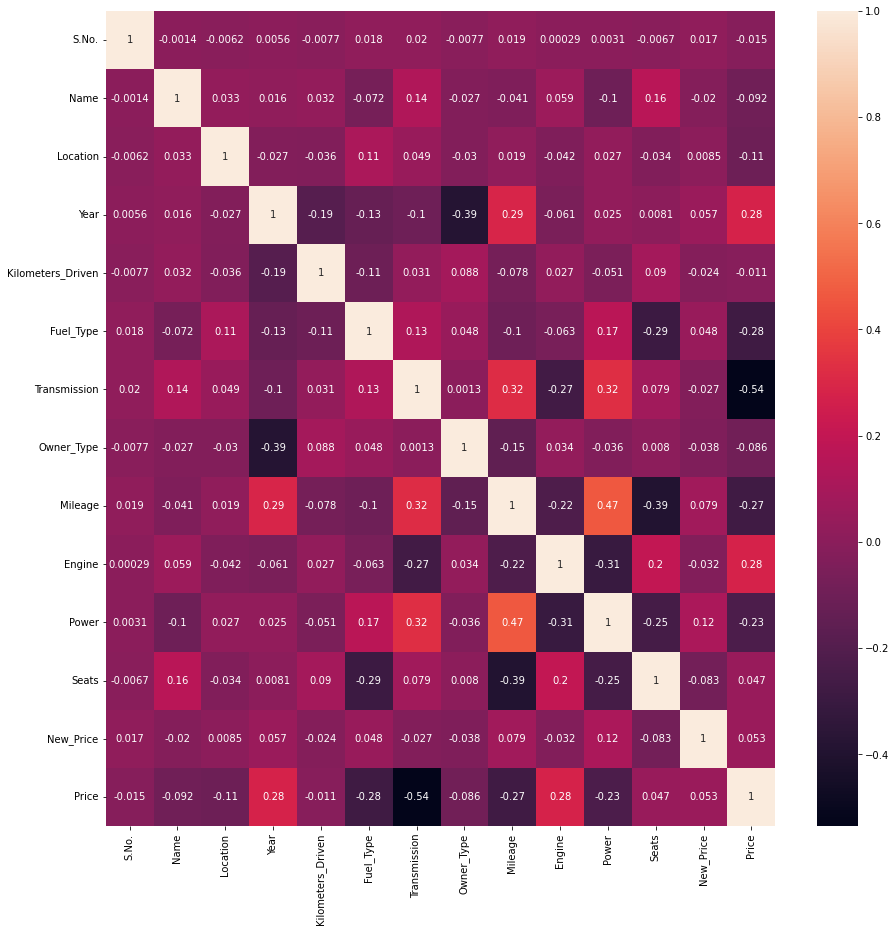

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True)

In [11]:
# task 5

x = df.drop(columns = ['Price'])
y = df['Price']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 1)

In [13]:
dtr = DecisionTreeRegressor()

In [14]:
dtr.fit(x_train , y_train)

DecisionTreeRegressor()

In [15]:
y_pred = dtr.predict(x_test)
y_pred

array([6.45      , 4.95      , 2.65      , ..., 9.47946835, 3.95      ,
       8.75      ])

In [16]:
dtr.score(x_train,y_train)

1.0

In [17]:
mt.r2_score(y_test , y_pred)

0.7938486206619898

In [18]:
mt.mean_absolute_error(y_test , y_pred)

1.8357408670032753

In [19]:
mt.mean_squared_error(y_test, y_pred)

23.802766085056476

In [20]:
# task 6

# hold out
train, test= train_test_split(x,test_size=0.25, random_state=1)
print("Train:",train,"Test:" ,test)

Train:       S.No.  Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
4740   4740   400         1  2013              61510          1             1   
3203   3203   496         9  2015              19000          4             0   
3675   3675  1265         0  2012              65000          1             1   
1573   1573  1164         9  2017              19234          0             1   
792     792   302         6  2008             205000          1             1   
...     ...   ...       ...   ...                ...        ...           ...   
905     905  1248         9  2008              91000          1             1   
5192   5192  1258         3  2008              50121          4             1   
3980   3980  1307         9  2010              70000          4             1   
235     235  1932         7  2019              14165          1             0   
5157   5157  1585         6  2016              12500          4             1   

      Owner_Type  Mi

In [21]:
# leave one out

LOO = LeaveOneOut()
for train, test in LOO.split(x):
     print("%s %s"% (train,test))

[   1    2    3 ... 7250 7251 7252] [0]
[   0    2    3 ... 7250 7251 7252] [1]
[   0    1    3 ... 7250 7251 7252] [2]
[   0    1    2 ... 7250 7251 7252] [3]
[   0    1    2 ... 7250 7251 7252] [4]
[   0    1    2 ... 7250 7251 7252] [5]
[   0    1    2 ... 7250 7251 7252] [6]
[   0    1    2 ... 7250 7251 7252] [7]
[   0    1    2 ... 7250 7251 7252] [8]
[   0    1    2 ... 7250 7251 7252] [9]
[   0    1    2 ... 7250 7251 7252] [10]
[   0    1    2 ... 7250 7251 7252] [11]
[   0    1    2 ... 7250 7251 7252] [12]
[   0    1    2 ... 7250 7251 7252] [13]
[   0    1    2 ... 7250 7251 7252] [14]
[   0    1    2 ... 7250 7251 7252] [15]
[   0    1    2 ... 7250 7251 7252] [16]
[   0    1    2 ... 7250 7251 7252] [17]
[   0    1    2 ... 7250 7251 7252] [18]
[   0    1    2 ... 7250 7251 7252] [19]
[   0    1    2 ... 7250 7251 7252] [20]
[   0    1    2 ... 7250 7251 7252] [21]
[   0    1    2 ... 7250 7251 7252] [22]
[   0    1    2 ... 7250 7251 7252] [23]
[   0    1    2 ... 7250 7

In [22]:
# kfold

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=False, random_state=None)
for train, test in kf.split(x):
     print("Train data",train,"Test data",test)


Train data [2418 2419 2420 ... 7250 7251 7252] Test data [   0    1    2 ... 2415 2416 2417]
Train data [   0    1    2 ... 7250 7251 7252] Test data [2418 2419 2420 ... 4833 4834 4835]
Train data [   0    1    2 ... 4833 4834 4835] Test data [4836 4837 4838 ... 7250 7251 7252]
